In [1]:
import benchmark_funs as bf
bf_functions = bf.benchmark_functions
lb = [f.lb  for f in bf_functions for j in range(f.dimension)]
ub = [f.ub  for f in bf_functions for j in range(f.dimension)]
dims = [f.dimension for f in bf_functions]
dim = sum(dims)
varTypes = [0]*dim
budget = 10000 * dim

/home/yecm/anaconda3/envs/torch2.0/lib/python3.9/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |  100   |60525634000.0|2.4879573e+22|3.0126383e+20|60525634000.0|     inf     
 1 |  200   |32248898000.0|1.4322161e+16|1625144200000000.0|32248898000.0|3068359800000000.0
 2 |  300   | 2818683000.0|186517860000000.0|23181694000000.0| 2818683000.0|39727307000000.0
 3 |  400   | 2719058400.0|1856778000000.0|798486950000.0| 2719058400.0|753656140000.0
 4 |  500   | 1375404300.0|361520270000.0|78183100000.0| 1375404300.0|113784316000.0
 5 |  600   | 289355650.0 |27906724000.0| 5957402600.0| 289355650.0 | 5727411000.0
 6 |  700   | 289355650.0 | 3194077200.0| 2538205200.0| 289355650.0 | 616637440.0 
 7 |  800   | 289355650.0 | 2723399200.0| 2080431100.0| 289355650.0 | 819901800.0 
 8 |  900   | 289349950.0 | 2371107000.0| 1117834400.0| 289349950.0 | 541030000.0 
 9 |  1000  | 239992420.0 | 835044500.0 | 555508800.0 | 23999

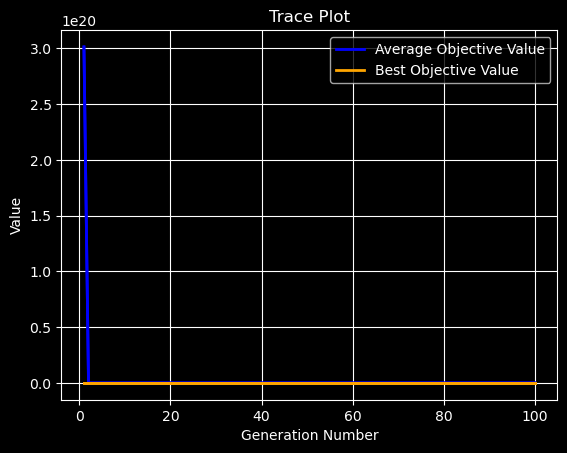

Execution time: 10.031137466430664 s
Evaluation number: 10000
The best objective value is: 20154338.0
The best variables are: 
-7.550305500626564	-65.9823814406991	-39.884879253804684	-42.492979764938354	-38.29743592068553	-12.457355484366417	-11.497980821877718	-49.064326751977205	-4.026385303586721	1.092451624572277	66.98932722210884	-21.5338833630085	53.926024585962296	-8.662240020930767	-13.867021538317204	-13.42426398769021	-69.85529931262136	21.532605681568384	7.964284997433424	35.9690603800118	-74.12781035527587	-16.505225095897913	-60.49910681322217	-81.10364833846688	-78.02583603188396	-79.02724863961339	-91.61705235019326	-13.061759434640408	-81.44010584801435	67.38260397687554	0.21835695952177048	2.26281744427979	-16.867731856182218	-3.371853595599532	-7.5325702875852585	2.834608554840088	-4.500294579192996	-1.5110759250819683	2.972478624433279	-12.236998714506626	-2.7371045015752316	-7.114701373502612	6.309396307915449	-6.974906958639622	-10.974738886579871	-2.0228179357945

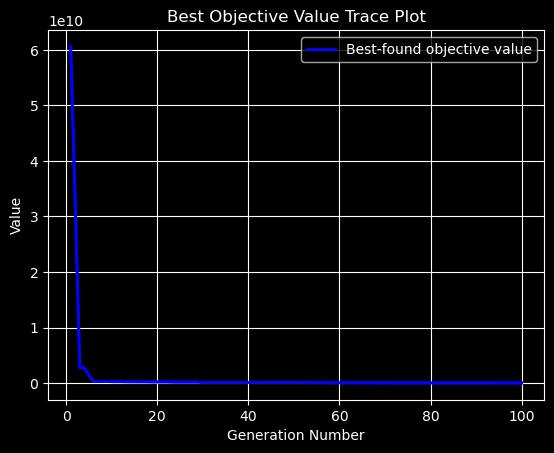

In [2]:
import geatpy as ea
import torch
# 构建问题
@ea.Problem.single
def evalVars(Vars):  # 定义目标函数（含约束）
    S1 = 0
    current_dim_start = 0
    for f in bf_functions:
        S1+=f(torch.Tensor(Vars[current_dim_start:current_dim_start+f.dimension]).reshape(1, -1))
        current_dim_start += f.dimension
    return S1, 0

problem = ea.Problem(name='演化计算求解',
                     M=1,  # 目标维数
                     maxormins=[1],  # 目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标
                     Dim=dim,  # 决策变量维数
                     varTypes=varTypes,  # 决策变量的类型列表，0：实数；1：整数
                     lb=lb,  # 决策变量下界
                     ub=ub,  # 决策变量上界
                     evalVars=evalVars)
NIND = 100
MAXGEN = budget//(NIND*dim)
# 构建算法
algorithm = ea.soea_SEGA_templet(problem,
                                 ea.Population(Encoding='RI', NIND=NIND),
                                #  MAXGEN=80,  # 最大进化代数。
                                 MAXGEN=MAXGEN,  # 最大进化代数。
                                 logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
                                #  trappedValue=1e-8,  # 单目标优化陷入停滞的判断阈值。
                                 trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
                                 maxTrappedCount=100)  # 进化停滞计数器最大上限值。
                                #  maxTrappedCount=10)  # 进化停滞计数器最大上限值。
# 求解
res = ea.optimize(algorithm, 
    seed=128, verbose=True, drawing=1, outputMsg=True, drawLog=True, saveFlag=True, dirName='runs/geatpy')